### EEG Classification Model

This project focuses on building a classification model to analyze EEG data, crucial for neurological diagnosis, especially in epilepsy. Two diverse EEG datasets will be used for training and evaluation. The process involves data preprocessing, designing a robust classification model using deep learning architectures, and optimizing for accuracy and interpretability. Ethical considerations, including patient privacy, will be addressed. The model's success will be measured through metrics like accuracy and F1 score, and its integration into medical practices for real-world impact will be explored. The ultimate goal is to enhance diagnostic capabilities in neurology through AI-driven EEG data analysis.

In [67]:
!pip install --upgrade mne

In [68]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


### 1) Data Preprocessing:

In [95]:
import os
import mne

def extract_data_from_edf(paths):
    seizure_data = []
    non_seizure_data = []

    for path in paths:
        # Loop through files in the specified path
        for filename in os.listdir(path):
            file_path = os.path.join(path, filename)
            
            try:
                if filename.endswith(".edf"):
                    raw_data = mne.io.read_raw_edf(file_path, preload=True)
                    non_seizure_data.append(raw_data)
                    # Check for a condition specific to seizure data files
                elif "seizures" in filename.lower():  # Modify this condition as per your file naming convention
                        seizure_data.append(raw_data)
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

    return seizure_data, non_seizure_data

# Paths where your EDF files are located
data_paths = [r"C:\Users\Aishwariya\Documents\dataset_project 3\chb02"]

# Extract seizure and non-seizure data from multiple paths
seizure_data, non_seizure_data = extract_data_from_edf(data_paths)

Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\._chb02_01.edf...
EDF file detected
Error processing C:\Users\Aishwariya\Documents\dataset_project 3\chb02\._chb02_01.edf: invalid literal for int() with base 10: 'fari;4DE'
Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\._chb02_02.edf...
EDF file detected
Error processing C:\Users\Aishwariya\Documents\dataset_project 3\chb02\._chb02_02.edf: invalid literal for int() with base 10: 'fari;4DE'
Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\._chb02_03.edf...
EDF file detected
Error processing C:\Users\Aishwariya\Documents\dataset_project 3\chb02\._chb02_03.edf: invalid literal for int() with base 10: 'fari;4DE'
Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\._chb02_04.edf...
EDF file detected
Error processing C:\Users\Aishwariya\Documents\dataset_project 3\chb02\._chb02_04.edf: invalid literal

C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_16+.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 245503  =      0.000 ...   958.996 secs...
Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_20.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_21.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_22.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_23.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_24.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_25.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_26.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_27.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_28.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_29.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_30.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_31.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_32.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_33.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...
Error processing C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_33.edf: Unable to allocate 162. MiB for an array with shape (23, 921600) and data type float64
Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_34.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...
Error processing C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_34.edf: Unable to allocate 162. MiB for an array with shape (23, 921600) and data type float64
Extracting EDF parameters from C:\Users\Aishwariya\Documents\dataset_project 3\chb02\chb02_35.edf...
EDF file detected
Setting channel info structure...
Creating raw.info str

C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\Aishwariya\AppData\Local\Temp\ipykernel_24268\40383173.py:15: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


In [70]:
seizure_data

[<RawEDF | chb02_16+.edf, 23 x 921600 (3600.0 s), ~161.7 MB, data loaded>,
 <RawEDF | chb02_16.edf, 23 x 245504 (959.0 s), ~43.1 MB, data loaded>,
 <RawEDF | chb02_19.edf, 23 x 921600 (3600.0 s), ~161.7 MB, data loaded>]

### 2) Feature Extraction

<Info | 8 non-empty values
 bads: []
 ch_names: FP1-F7, F7-T7, T7-P7, P7-O1, FP1-F3, F3-C3, C3-P3, P3-O1, ...
 chs: 23 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2074-07-25 10:50:23 UTC
 nchan: 23
 projs: []
 sfreq: 256.0 Hz
 subject_info: 1 item (dict)
>


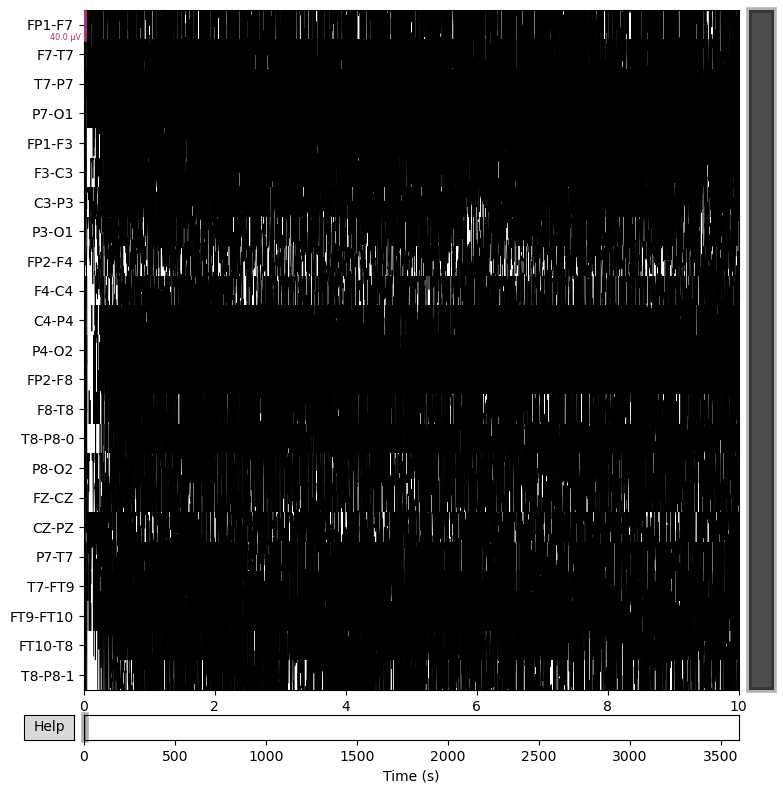

<Info | 8 non-empty values
 bads: []
 ch_names: FP1-F7, F7-T7, T7-P7, P7-O1, FP1-F3, F3-C3, C3-P3, P3-O1, ...
 chs: 23 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2074-07-25 09:31:46 UTC
 nchan: 23
 projs: []
 sfreq: 256.0 Hz
 subject_info: 1 item (dict)
>


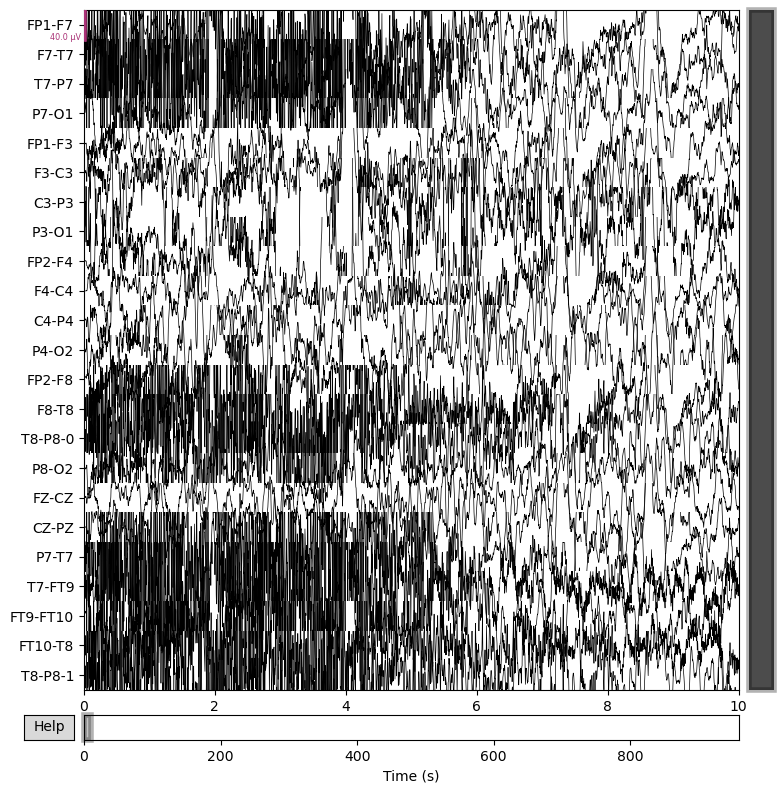

<Info | 8 non-empty values
 bads: []
 ch_names: FP1-F7, F7-T7, T7-P7, P7-O1, FP1-F3, F3-C3, C3-P3, P3-O1, ...
 chs: 23 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2074-07-25 13:50:45 UTC
 nchan: 23
 projs: []
 sfreq: 256.0 Hz
 subject_info: 1 item (dict)
>


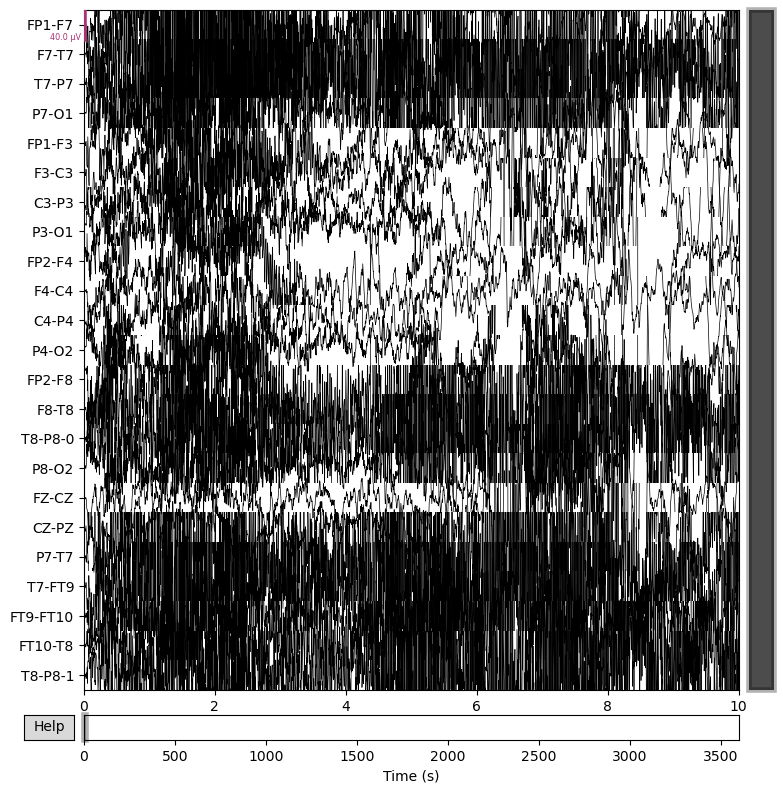

<Info | 8 non-empty values
 bads: []
 ch_names: FP1-F7, F7-T7, T7-P7, P7-O1, FP1-F3, F3-C3, C3-P3, P3-O1, ...
 chs: 23 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2074-07-24 15:29:39 UTC
 nchan: 23
 projs: []
 sfreq: 256.0 Hz
 subject_info: 1 item (dict)
>


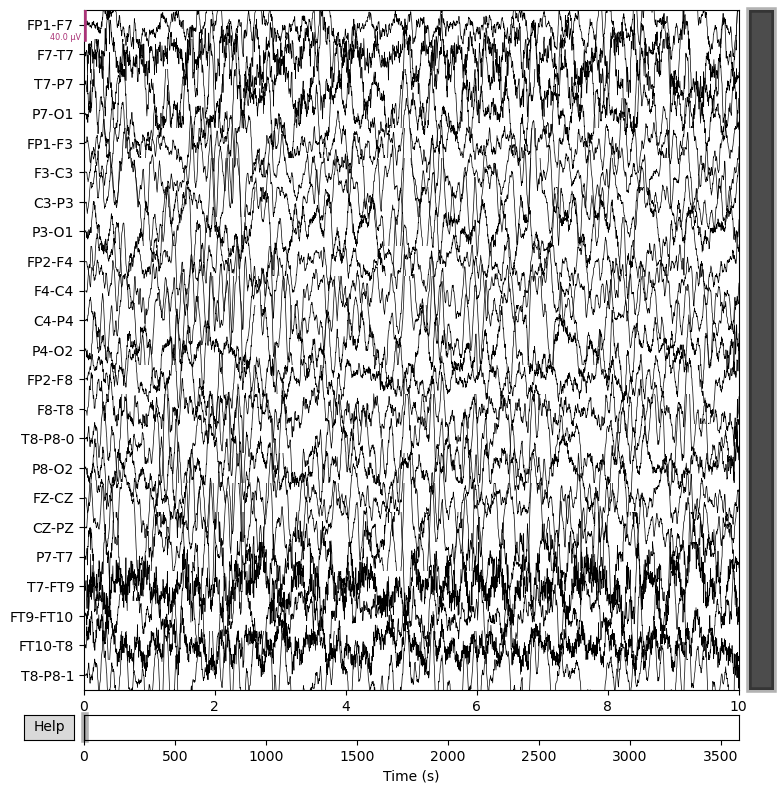

<Info | 8 non-empty values
 bads: []
 ch_names: FP1-F7, F7-T7, T7-P7, P7-O1, FP1-F3, F3-C3, C3-P3, P3-O1, ...
 chs: 23 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2074-07-24 17:29:49 UTC
 nchan: 23
 projs: []
 sfreq: 256.0 Hz
 subject_info: 1 item (dict)
>


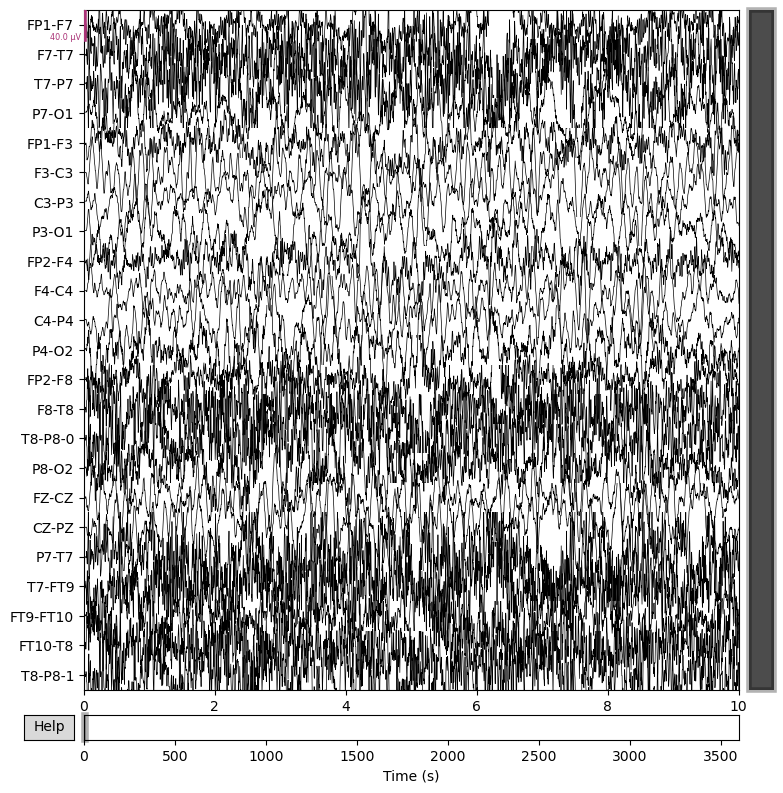

<Info | 8 non-empty values
 bads: []
 ch_names: FP1-F7, F7-T7, T7-P7, P7-O1, FP1-F3, F3-C3, C3-P3, P3-O1, ...
 chs: 23 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2074-07-24 18:29:56 UTC
 nchan: 23
 projs: []
 sfreq: 256.0 Hz
 subject_info: 1 item (dict)
>


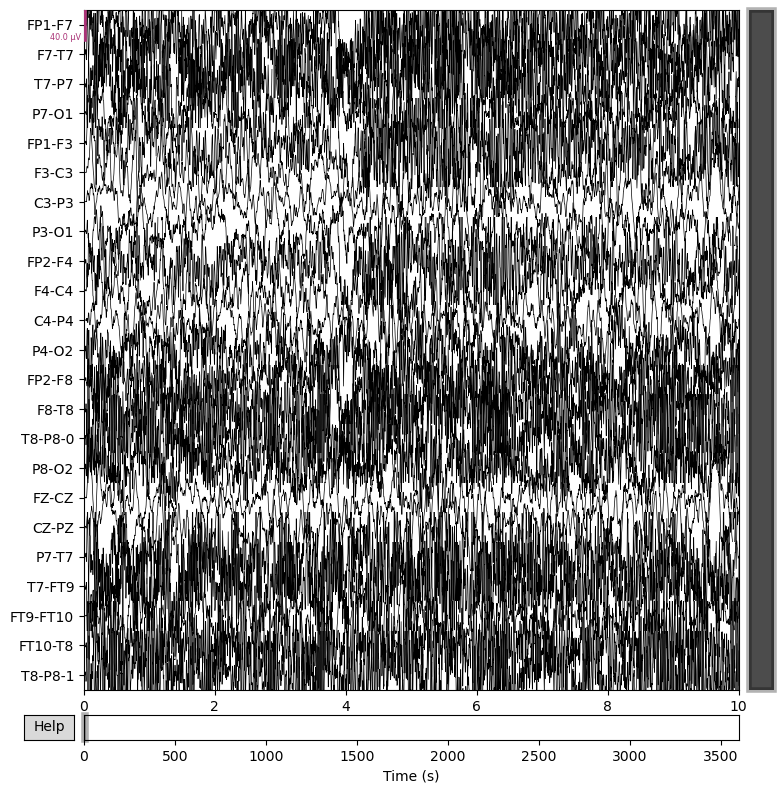

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.4s finished


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.7s finished


In [96]:
import os
import mne
import numpy as np
from mne.datasets import eegbci

def download_and_extract_data(target_path):
    if not os.path.exists(target_path):
        os.makedirs(target_path)
    
    # Download EEGBCI dataset
    eegbci.load_data(1, [4, 8, 12], path=target_path)  # Replace [4, 8, 12] with the desired runs

# Define the path where you want to store the downloaded data
data_path = r"C:\Users\Aishwariya\Documents\dataset_project 3\chb02"

# Download and extract data
download_and_extract_data(data_path)

# Explore the data to understand its structure and characteristics
def explore_data(raw_data):
    # Print basic information about the data
    print(raw_data.info)

    # Plot the raw EEG data
    raw_data.plot(duration=10, n_channels=30)  # Adjust the number of channels as needed

# Assume you have already downloaded and extracted the data using the previous code

# Explore the first few samples of seizure and non-seizure data
for data in seizure_data[:3] + non_seizure_data[:3]:
    explore_data(data)

# Preprocess the EEG data
def preprocess_data(raw_data):
    # Example: Apply bandpass filter for noise reduction
    raw_data.filter(l_freq=0.5, h_freq=50)

# Apply preprocessing to seizure and non-seizure data
for data in seizure_data + non_seizure_data:
    preprocess_data(data)

### 3) Data Splitting

In [98]:
import numpy as np
from scipy.signal import welch

def extract_features(raw_data):
    # Time-domain features
    time_features = {
        'mean': np.mean(raw_data._data, axis=1),  # Mean value of each channel
        'std': np.std(raw_data._data, axis=1),    # Standard deviation of each channel
        'min': np.min(raw_data._data, axis=1),    # Minimum value of each channel
        'max': np.max(raw_data._data, axis=1),    # Maximum value of each channel
        'median': np.median(raw_data._data, axis=1)  # Median value of each channel
        # Add more time-domain features as needed
    }

    # Frequency-domain features (using power spectral density)
    fmin, fmax = 0.5, 50  # Define frequency range of interest
    psd_freqs, psd = welch(raw_data._data, fs=raw_data.info['sfreq'], nperseg=256)  # Adjust nperseg as needed

    # Frequency-domain features
    freq_features = {
        'mean_power': np.mean(psd, axis=1),       # Mean power across frequencies for each channel
        'max_power': np.max(psd, axis=1),         # Maximum power across frequencies for each channel
        'peak_freq': psd_freqs[np.argmax(psd, axis=1)]  # Frequency at which the power is maximum for each channel
        # Add more frequency-domain features as needed
    }

    # Combine time and frequency features
    features = {**time_features, **freq_features}

    return features

# Extract features for seizure and non-seizure data
seizure_features = [extract_features(data) for data in seizure_data]
non_seizure_features = [extract_features(data) for data in non_seizure_data]

# Convert features to NumPy arrays for further processing or modeling
seizure_features_array = np.array(list(seizure_features[0].values()))
non_seizure_features_array = np.array(list(non_seizure_features[0].values()))

In [73]:
# Print extracted features for seizure data
print("Seizure Features:")
for key, value in seizure_features[0].items():
    print(f"{key}: {value}")

# Print extracted features for non-seizure data
print("\nNon-Seizure Features:")
for key, value in non_seizure_features[0].items():
    print(f"{key}: {value}")

Seizure Features:
mean: [-7.67568765e-09  1.61433583e-08 -3.84155958e-09  2.69166715e-08
  4.95950860e-08 -5.56113504e-08  3.32370811e-08  4.28888452e-09
  8.56556330e-09  1.99040125e-08 -6.73045562e-08  6.19992667e-08
 -4.03121677e-08  8.98490768e-08  5.46053763e-08 -8.09219371e-08
  1.76785184e-08  1.78664498e-08  3.84155958e-09 -3.06576199e-08
  3.45801464e-08  4.04379798e-08  5.46053763e-08]
std: [1.10159746e-04 1.04862850e-04 9.45979542e-05 7.82334759e-05
 1.11575989e-04 8.64596957e-05 8.39202523e-05 8.71167577e-05
 6.90771380e-05 6.35634529e-05 1.05440453e-04 9.51524258e-05
 1.05477761e-04 9.95966438e-05 6.26217299e-05 1.20362444e-04
 5.42465465e-05 6.36087942e-05 9.45979542e-05 1.07254809e-04
 8.89670804e-05 1.03712267e-04 6.26217299e-05]
min: [-0.00234295 -0.00256283 -0.00223339 -0.00235464 -0.00232033 -0.00265042
 -0.00240689 -0.00243831 -0.00181868 -0.00185269 -0.00272598 -0.00257103
 -0.00263403 -0.00225357 -0.00195495 -0.00278919 -0.0018295  -0.00183094
 -0.00241035 -0.0024

### 4) Model Selection

In [74]:
from sklearn.model_selection import train_test_split

# Combine seizure and non-seizure features and labels
X_seizure = np.array(seizure_features)
X_non_seizure = np.array(non_seizure_features)
X = np.concatenate([X_seizure, X_non_seizure], axis=0)

y_seizure = np.ones((X_seizure.shape[0], 1))  # Label 1 for seizure data
y_non_seizure = np.zeros((X_non_seizure.shape[0], 1))  # Label 0 for non-seizure data
y = np.concatenate([y_seizure, y_non_seizure], axis=0)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print(f"Training set shape: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Validation set shape: X_val {X_val.shape}, y_val {y_val.shape}")
print(f"Test set shape: X_test {X_test.shape}, y_test {y_test.shape}")

Training set shape: X_train (24,), y_train (24, 1)
Validation set shape: X_val (5,), y_val (5, 1)
Test set shape: X_test (6,), y_test (6, 1)


### 5) Model Training

C:\Users\Aishwariya\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aishwariya\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Epoch 1/20
1/1 [==============================] - 8s 8s/step - loss: 0.6931 - accuracy: 0.6842 - val_loss: 0.6890 - val_accuracy: 1.0000
Epoch 2/20
1/1 [==============================] - 0s 92ms/step - loss: 0.6903 - accuracy: 0.8421 - val_loss: 0.6818 - val_accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 88ms/step - loss: 0.6847 - accuracy: 0.8421 - val_loss: 0.6734 - val_accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 83ms/step - loss: 0.6794 - accuracy: 0.8421 - val_loss: 0.6635 - val_accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 80ms/step - loss: 0.6707 - accuracy: 0.8421 - val_loss: 0.6514 - val_accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 77ms/step - loss: 0.6682 - accuracy: 0.8421 - val_loss: 0.6364 - val_accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 93ms/step - loss: 0.6553 - accuracy: 0.8421 - val_loss: 0.6175 - val_accuracy: 1.0000
Epoch 8/20
1/1 [=============

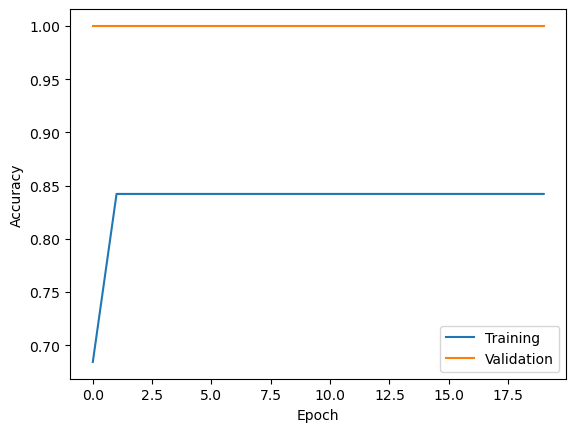

In [99]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming X_train is a list of dictionaries, and each dictionary contains 'mean' key with statistical metrics
num_samples = len(X_train)
num_data_points = len(X_train[0]['mean'])  # Assuming 'mean' is a key in the dictionary
num_features = len(['mean', 'std', 'min', 'max', 'delta_power', 'theta_power', 'alpha_power', 'beta_power'])

# Reshaping X_train
num_samples_test = len(X_test)

X_train_rnn = np.zeros((num_samples, num_data_points, num_features))
X_test_rnn = np.zeros((num_samples_test, num_data_points, num_features))

for i, sample in enumerate(X_train):
    for j, feature in enumerate(['mean', 'std', 'min', 'max', 'delta_power', 'theta_power', 'alpha_power', 'beta_power']):
        # Use a default value of 0 if the key is missing
        X_train_rnn[i, :, j] = sample.get(feature, 0)

# Assuming y_train and y_test are the target labels
# Label Encoding for y_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define the RNN (LSTM) model
model_rnn = Sequential()
model_rnn.add(LSTM(64, input_shape=(num_data_points, num_features), return_sequences=True))
model_rnn.add(LSTM(64))
model_rnn.add(Dense(128, activation='relu'))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the RNN (LSTM) model
history=model_rnn.fit(X_train_rnn, y_train_encoded, batch_size=32, epochs=20, validation_split=0.2)

# Convert X_test to the required format similarly as done for X_train
for i, sample in enumerate(X_test):
    for j, feature in enumerate(['mean', 'std', 'min', 'max', 'delta_power', 'theta_power', 'alpha_power', 'beta_power']):
        # Use a default value of 0 if the key is missing
        X_test_rnn[i, :, j] = sample.get(feature, 0)    
        
# Evaluate on test set
score_train= model_rnn.evaluate(X_train_rnn, y_train_encoded, verbose=0)
score = model_rnn.evaluate(X_test_rnn, y_test_encoded, verbose=0)
print("Train loss:", score_train[0])
print("Train accuracy:", score_train[1])
print("Test loss:", score[0])
print("Test accuracy:", score[1])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.show()

In [76]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming X_train is a list of dictionaries
num_samples = len(X_train)
num_data_points = len(X_train[0]['mean'])  # Assuming 'mean' is a key in the dictionary
num_features = len(['mean', 'std', 'min', 'max', 'theta_power', 'alpha_power', 'beta_power'])

# Reshaping X_train
num_samples_test = len(X_test)

X_train_cnn = np.zeros((num_samples, num_data_points, num_features))
X_test_cnn = np.zeros((num_samples_test, num_data_points, num_features))

for i, sample in enumerate(X_train):
    for j, feature in enumerate(['mean', 'std', 'min', 'max', 'theta_power', 'alpha_power', 'beta_power']):
        # Fill in zeros if the key is missing
        X_train_cnn[i, :, j] = sample.get(feature, 0)

# Assuming y_train and y_test are the target labels
# Label Encoding for y_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define the CNN model
model_cnn = models.Sequential()
model_cnn.add(layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(num_data_points, num_features)))
model_cnn.add(layers.MaxPooling1D(pool_size=2))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(128, activation='relu'))
model_cnn.add(layers.Dropout(0.5))
model_cnn.add(layers.Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the CNN model
model_cnn.fit(X_train_cnn, y_train_encoded, batch_size=32, epochs=20, validation_split=0.2)

# Convert X_test to the required format similarly as done for X_train
for i, sample in enumerate(X_test):
    for j, feature in enumerate(['mean', 'std', 'min', 'max', 'theta_power', 'alpha_power', 'beta_power']):
        # Fill in zeros if the key is missing
        X_test_cnn[i, :, j] = sample.get(feature, 0)

# Evaluate on test set
score = model_cnn.evaluate(X_test_cnn, y_test_encoded, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

C:\Users\Aishwariya\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aishwariya\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.6932 - accuracy: 0.4211 - val_loss: 0.6893 - val_accuracy: 1.0000
Epoch 2/20
1/1 [==============================] - 0s 59ms/step - loss: 0.6905 - accuracy: 0.8421 - val_loss: 0.6846 - val_accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 52ms/step - loss: 0.6871 - accuracy: 0.8421 - val_loss: 0.6796 - val_accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 55ms/step - loss: 0.6842 - accuracy: 0.8421 - val_loss: 0.6741 - val_accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 52ms/step - loss: 0.6809 - accuracy: 0.8421 - val_loss: 0.6679 - val_accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 56ms/step - loss: 0.6737 - accuracy: 0.8421 - val_loss: 0.6611 - val_accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 65ms/step - loss: 0.6731 - accuracy: 0.8421 - val_loss: 0.6537 - val_accuracy: 1.0000
Epoch 8/20
1/1 [=============

### 6) Model Evaluation

C:\Users\Aishwariya\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aishwariya\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.6932 - accuracy: 0.2105 - val_loss: 0.6908 - val_accuracy: 1.0000
Epoch 2/50
1/1 [==============================] - 0s 65ms/step - loss: 0.6915 - accuracy: 0.8421 - val_loss: 0.6876 - val_accuracy: 1.0000
Epoch 3/50
1/1 [==============================] - 0s 68ms/step - loss: 0.6891 - accuracy: 0.8421 - val_loss: 0.6842 - val_accuracy: 1.0000
Epoch 4/50
1/1 [==============================] - 0s 56ms/step - loss: 0.6871 - accuracy: 0.8421 - val_loss: 0.6804 - val_accuracy: 1.0000
Epoch 5/50
1/1 [==============================] - 0s 56ms/step - loss: 0.6851 - accuracy: 0.8421 - val_loss: 0.6763 - val_accuracy: 1.0000
Epoch 6/50
1/1 [==============================] - 0s 60ms/step - loss: 0.6823 - accuracy: 0.8421 - val_loss: 0.6718 - val_accuracy: 1.0000
Epoch 7/50
1/1 [==============================] - 0s 63ms/step - loss: 0.6795 - accuracy: 0.8421 - val_loss: 0.6669 - val_accuracy: 1.0000
Epoch 8/50
1/1 [=============

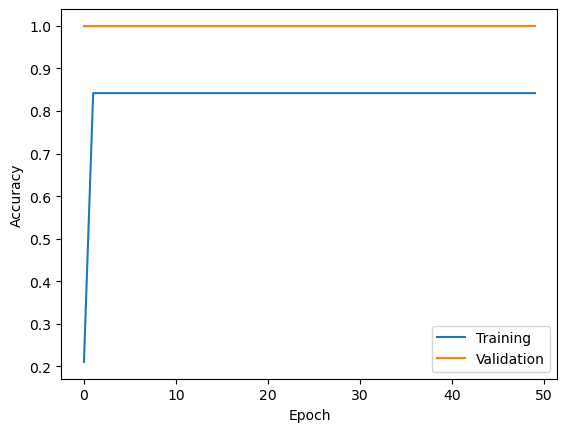

In [101]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, callbacks
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming X_train is a list of dictionaries
num_samples = len(X_train)
num_data_points = len(X_train[0]['mean'])  # Assuming 'mean' is a key in the dictionary
num_features = len(['mean', 'std', 'min', 'max', 'theta_power', 'alpha_power', 'beta_power'])

# Reshaping X_train
num_samples_test = len(X_test)

X_train_cnn = np.zeros((num_samples, num_data_points, num_features))
X_test_cnn = np.zeros((num_samples_test, num_data_points, num_features))

for i, sample in enumerate(X_train):
    for j, feature in enumerate(['mean', 'std', 'min', 'max', 'theta_power', 'alpha_power', 'beta_power']):
        # Fill in zeros if the key is missing
        X_train_cnn[i, :, j] = sample.get(feature, 0)

# Assuming y_train and y_test are the target labels
# Label Encoding for y_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define the CNN model with dropout
model_cnn = models.Sequential()
model_cnn.add(layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(num_data_points, num_features)))
model_cnn.add(layers.MaxPooling1D(pool_size=2))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(128, activation='relu'))
model_cnn.add(layers.Dropout(0.5))  # Dropout layer to avoid overfitting
model_cnn.add(layers.Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the CNN model with early stopping
history = model_cnn.fit(
    X_train_cnn, y_train_encoded,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[early_stopping],
    verbose=1
)

# Convert X_test to the required format similarly as done for X_train
for i, sample in enumerate(X_test):
    for j, feature in enumerate(['mean', 'std', 'min', 'max', 'theta_power', 'alpha_power', 'beta_power']):
        # Fill in zeros if the key is missing
        X_test_cnn[i, :, j] = sample.get(feature, 0)

# Evaluate on test set
score = model_cnn.evaluate(X_test_cnn, y_test_encoded, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
score_train= model_rnn.evaluate(X_train_rnn, y_train_encoded, verbose=0)
print("Train loss:", score_train[0])
print("Train accuracy:", score_train[1])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.show()

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Assuming X_train_cnn, y_train_encoded, X_val_cnn, y_val_encoded are defined

# Define the CNN model
model_cnn = Sequential()
model_cnn.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(2, activation='softmax'))  # Assuming two classes, adjust accordingly

# Compile the model
model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# Train the CNN model
history = model_cnn.fit(X_train_cnn, y_train_encoded, batch_size=32, epochs=20,
                        validation_data=(X_val_cnn, y_val_encoded),
                        callbacks=[early_stopping], verbose=2)

# Evaluate on validation set
y_val_pred_probs = model_cnn.predict(X_val_cnn)
y_val_pred_classes = np.argmax(y_val_pred_probs, axis=1)

# Calculate evaluation metrics
accuracy_val = accuracy_score(y_val_encoded, y_val_pred_classes)
precision_val = precision_score(y_val_encoded, y_val_pred_classes, average='weighted')
recall_val = recall_score(y_val_encoded, y_val_pred_classes, average='weighted')
f1_val = f1_score(y_val_encoded, y_val_pred_classes, average='weighted')

print("Validation Set Metrics:")
print(f"Accuracy: {accuracy_val}")
print(f"Precision: {precision_val}")
print(f"Recall: {recall_val}")
print(f"F1-score: {f1_val}")

Epoch 1/20
1/1 - 1s - loss: 0.6930 - accuracy: 0.6250 - val_loss: 0.6896 - val_accuracy: 0.8333 - 1s/epoch - 1s/step
Epoch 2/20
1/1 - 0s - loss: 0.6892 - accuracy: 0.8750 - val_loss: 0.6856 - val_accuracy: 0.8333 - 51ms/epoch - 51ms/step
Epoch 3/20
1/1 - 0s - loss: 0.6853 - accuracy: 0.8750 - val_loss: 0.6813 - val_accuracy: 0.8333 - 43ms/epoch - 43ms/step
Epoch 4/20
1/1 - 0s - loss: 0.6798 - accuracy: 0.8750 - val_loss: 0.6764 - val_accuracy: 0.8333 - 45ms/epoch - 45ms/step
Epoch 5/20
1/1 - 0s - loss: 0.6740 - accuracy: 0.8750 - val_loss: 0.6710 - val_accuracy: 0.8333 - 48ms/epoch - 48ms/step
Epoch 6/20
1/1 - 0s - loss: 0.6695 - accuracy: 0.8750 - val_loss: 0.6650 - val_accuracy: 0.8333 - 44ms/epoch - 44ms/step
Epoch 7/20
1/1 - 0s - loss: 0.6602 - accuracy: 0.8750 - val_loss: 0.6585 - val_accuracy: 0.8333 - 47ms/epoch - 47ms/step
Epoch 8/20
1/1 - 0s - loss: 0.6552 - accuracy: 0.8750 - val_loss: 0.6513 - val_accuracy: 0.8333 - 43ms/epoch - 43ms/step
Epoch 9/20
1/1 - 0s - loss: 0.6467 -

C:\Users\Aishwariya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 7) Testing

In [79]:
import numpy as np

def create_feature_matrix(data, feature_names):
    num_samples = len(data)
    num_features = len(feature_names)
    num_data_points = len(data[0][feature_names[0]])
    
    X_matrix = np.zeros((num_samples, num_data_points, num_features))
    
    for i, sample in enumerate(data):
        for j, feature in enumerate(feature_names):
            # Check if the feature exists in the sample
            if feature in sample:
                X_matrix[i, :, j] = sample[feature]
            else:
                # Handle missing feature, e.g., set it to a default value
                X_matrix[i, :, j] = 0.0  # You can choose a suitable default value
            
    return X_matrix

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

# Add the create_feature_matrix function here

# Assuming X_train and X_test are lists of dictionaries, where each dictionary contains statistical metrics
feature_names_train = ['mean', 'std', 'min', 'max', 'theta_power', 'alpha_power', 'beta_power']

# Create feature matrices for training and test sets
X_train_cnn = create_feature_matrix(X_train, feature_names_train)
X_test_cnn = create_feature_matrix(X_test, feature_names_train)

# Assuming y_train and y_test are your target labels
# Label Encoding for y_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Build your CNN model
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(100, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(1, activation='sigmoid'))

# Compile the model
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_cnn.fit(X_train_cnn, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on the test set
y_test_pred_probs = model_cnn.predict(X_test_cnn)
y_test_pred_classes = (y_test_pred_probs > 0.5).astype(int)

# Inverse transform the encoded predictions to original labels
y_test_pred_original = label_encoder.inverse_transform(y_test_pred_classes.flatten())

# Calculate evaluation metrics
accuracy_test = accuracy_score(y_test, y_test_pred_original)
precision_test = precision_score(y_test, y_test_pred_original)
recall_test = recall_score(y_test, y_test_pred_original)
f1_test = f1_score(y_test, y_test_pred_original)

# Display the confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_test_pred_original)
print("Confusion Matrix (Test Set):")
print(conf_matrix_test)

# Print evaluation metrics for the test set
print("Test Accuracy: {:.4f}".format(accuracy_test))
print("Test Precision: {:.4f}".format(precision_test))
print("Test Recall: {:.4f}".format(recall_test))
print("Test F1 Score: {:.4f}".format(f1_test))

C:\Users\Aishwariya\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.6932 - accuracy: 0.5789 - val_loss: 0.6890 - val_accuracy: 1.0000
Epoch 2/20
1/1 [==============================] - 0s 49ms/step - loss: 0.6904 - accuracy: 0.8421 - val_loss: 0.6838 - val_accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 43ms/step - loss: 0.6867 - accuracy: 0.8421 - val_loss: 0.6781 - val_accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 43ms/step - loss: 0.6830 - accuracy: 0.8421 - val_loss: 0.6716 - val_accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 47ms/step - loss: 0.6778 - accuracy: 0.8421 - val_loss: 0.6643 - val_accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 44ms/step - loss: 0.6740 - accuracy: 0.8421 - val_loss: 0.6560 - val_accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 40ms/step - loss: 0.6669 - accuracy: 0.8421 - val_loss: 0.6468 - val_accuracy: 1.0000
Epoch 8/20
1/1 [=============

C:\Users\Aishwariya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aishwariya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aishwariya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1757: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


### 8) Results and Visualization

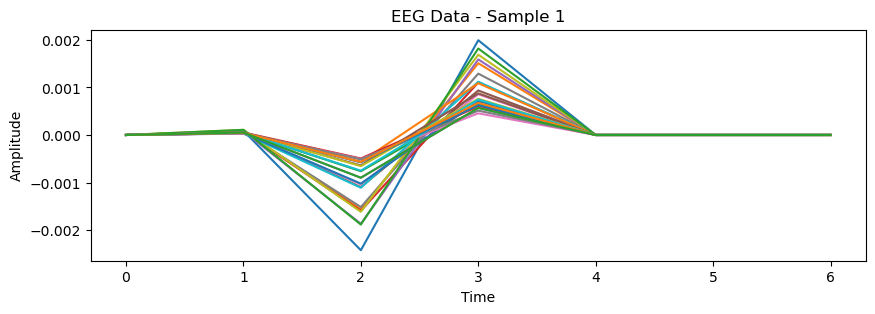

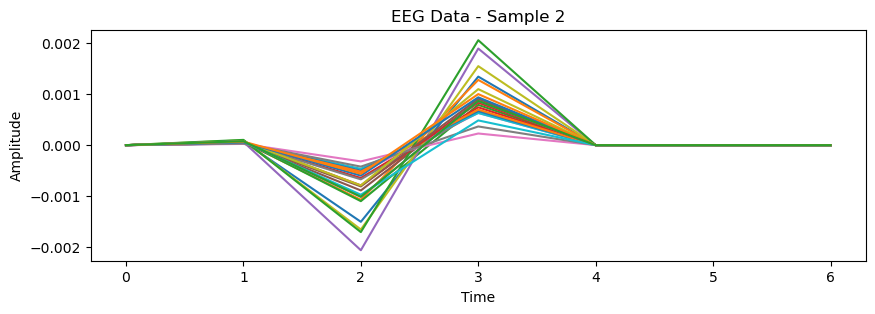

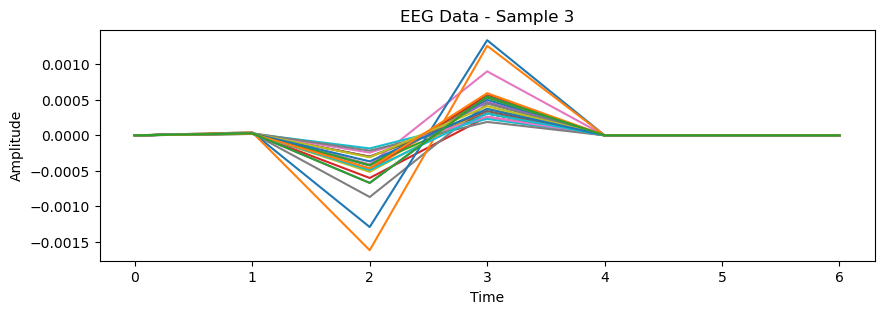

In [81]:
import matplotlib.pyplot as plt

# Select a few samples for visualization
num_samples_to_visualize = 3
samples_to_visualize = X_test_cnn[:num_samples_to_visualize]

# Plot EEG traces
for i in range(num_samples_to_visualize):
    plt.figure(figsize=(10, 3))
    plt.plot(samples_to_visualize[i].T)
    plt.title(f'EEG Data - Sample {i + 1}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

1/1 [==============================] - 0s 25ms/step


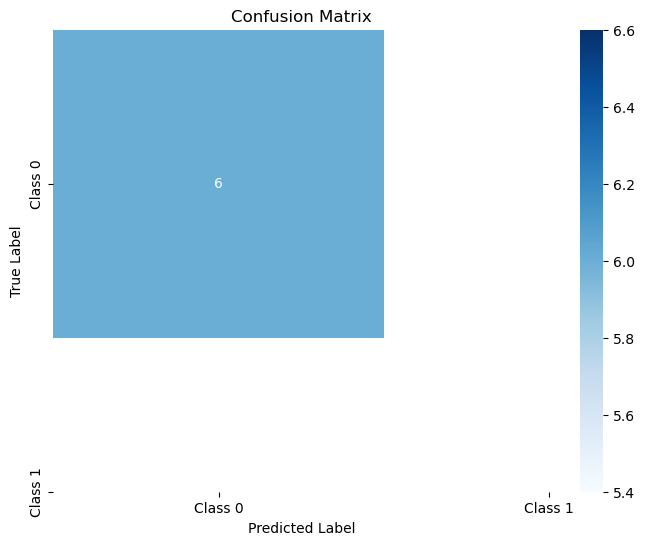

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_test_pred_probs = model_cnn.predict(X_test_cnn)

# Extract the class with the highest probability as the predicted class
y_test_pred_classes = np.argmax(y_test_pred_probs, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_test_encoded, y_test_pred_classes)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()